In [143]:
df=pd.read_csv('원본/POS00009T_20230430.csv', encoding='utf-8')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DELIV_DATE          252 non-null    int64  
 1   DELIV_PO_REGI_POCD  252 non-null    int64  
 2   DISC_NO             252 non-null    int64  
 3   DELIV_AREA_NO       252 non-null    int64  
 4   MAIL_KIND_SP_CD     252 non-null    int64  
 5   MAIL_SP_CD          252 non-null    int64  
 6   SPCL_TRT_CD         210 non-null    float64
 7   DOM_EM_YN           210 non-null    object 
 8   RCV_PO_REGI_POCD    210 non-null    float64
 9   VST_PRCL_YN         252 non-null    object 
 10  ELECT_MAIL_YN       50 non-null     object 
 11  CNTR_REGI_YN        0 non-null      float64
 12  PRSN_APPO_YN        169 non-null    object 
 13  CONG_MAIL_SP_CD     0 non-null      float64
 14  MAIL_WGHT           0 non-null      float64
 15  MAIL_VOLM           170 non-null    float64
 16  RCV_DATE

DELIV_DATE              0
DELIV_PO_REGI_POCD      0
DISC_NO                 0
DELIV_AREA_NO           0
MAIL_KIND_SP_CD         0
MAIL_SP_CD              0
SPCL_TRT_CD            42
DOM_EM_YN              42
RCV_PO_REGI_POCD       42
VST_PRCL_YN             0
ELECT_MAIL_YN         202
CNTR_REGI_YN          252
PRSN_APPO_YN           83
CONG_MAIL_SP_CD       252
MAIL_WGHT             252
MAIL_VOLM              82
RCV_DATE               43
SEMI_REGI_YN            2
BLD_MNGM_NO            46
DELIV_CTPV_NM          46
DELIV_CTGG_NM          46
DELIV_ADSTRD_NM        46
EUPD_IVNM              43
dtype: int64

In [144]:
df = df.dropna(subset=['RCV_DATE', 'DELIV_DATE', 'DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])

In [145]:
df.isnull().sum()

DELIV_DATE              0
DELIV_PO_REGI_POCD      0
DISC_NO                 0
DELIV_AREA_NO           0
MAIL_KIND_SP_CD         0
MAIL_SP_CD              0
SPCL_TRT_CD             0
DOM_EM_YN               0
RCV_PO_REGI_POCD        0
VST_PRCL_YN             0
ELECT_MAIL_YN         158
CNTR_REGI_YN          205
PRSN_APPO_YN           40
CONG_MAIL_SP_CD       205
MAIL_WGHT             205
MAIL_VOLM              38
RCV_DATE                0
SEMI_REGI_YN            1
BLD_MNGM_NO             0
DELIV_CTPV_NM           0
DELIV_CTGG_NM           0
DELIV_ADSTRD_NM         0
EUPD_IVNM               0
dtype: int64

In [146]:
df.to_csv('20230430_정제.csv', index=False, encoding='utf-8-sig')

In [151]:
rcv_raw = df["RCV_DATE"].astype(str).str.strip()
print("\n🔍 RCV_DATE 원시 값 샘플:")
print(rcv_raw.unique()[:20])


🔍 RCV_DATE 원시 값 샘플:
['20230428.0' '20230427.0' '20230421.0']


In [152]:
# 📂 CSV 병합 대상 폴더
cleaned_folder = "."  # or "cleaned_data"
merged_df = pd.DataFrame()

# 📄 CSV 파일 목록
file_list = [f for f in os.listdir(cleaned_folder) if f.endswith(".csv")]

# 📎 CSV 병합
for file_name in file_list:
    file_path = os.path.join(cleaned_folder, file_name)
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        merged_df = pd.concat([merged_df, df], ignore_index=True)
        print(f"📎 병합 완료: {file_name} (누적 행 수: {len(merged_df)})")
    except Exception as e:
        print(f"⚠️ 병합 실패: {file_name} / 오류: {e}")

# ✅ 날짜 처리 함수
def clean_date_column(series):
    raw = series.astype(str).str.strip()
    raw = raw.str.split(".").str[0]  # 🔹 '20230428.0' → '20230428'
    raw = raw.str.replace(r"[^0-9]", "", regex=True)
    valid_mask = raw.str.len() == 8
    result = pd.NaT
    result_series = pd.Series([pd.NaT] * len(raw))
    result_series.loc[valid_mask] = pd.to_datetime(raw[valid_mask], format='%Y%m%d', errors='coerce')
    return result_series

# ✅ 날짜 변환 적용
merged_df["RCV_DATE"] = clean_date_column(merged_df["RCV_DATE"])
merged_df["DELIV_DATE"] = clean_date_column(merged_df["DELIV_DATE"])

# ✅ 변환 결과 확인
print("\n🗓️ 날짜 변환 결과:")
print("RCV_DATE null 수:", merged_df["RCV_DATE"].isna().sum())
print("DELIV_DATE null 수:", merged_df["DELIV_DATE"].isna().sum())

print("\n✅ 최종 병합 및 날짜 처리 완료!")
print(merged_df.info())

C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


📎 병합 완료: 20230401_정제.csv (누적 행 수: 580003)
📎 병합 완료: 20230402_정제.csv (누적 행 수: 587400)
📎 병합 완료: 20230403_정제.csv (누적 행 수: 2011019)
📎 병합 완료: 20230404_정제.csv (누적 행 수: 4407104)
📎 병합 완료: 20230405_정제.csv (누적 행 수: 6589844)
📎 병합 완료: 20230406_정제.csv (누적 행 수: 9206893)
📎 병합 완료: 20230407_정제.csv (누적 행 수: 12116319)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


📎 병합 완료: 20230408_정제.csv (누적 행 수: 12746719)
📎 병합 완료: 20230409_정제.csv (누적 행 수: 12746733)
📎 병합 완료: 20230410_정제.csv (누적 행 수: 15200991)
📎 병합 완료: 20230411_정제.csv (누적 행 수: 18128583)
📎 병합 완료: 20230412_정제.csv (누적 행 수: 20455782)
📎 병합 완료: 20230413_정제.csv (누적 행 수: 22884735)
📎 병합 완료: 20230414_정제.csv (누적 행 수: 25399589)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


📎 병합 완료: 20230415_정제.csv (누적 행 수: 26011236)
📎 병합 완료: 20230416_정제.csv (누적 행 수: 26011322)
📎 병합 완료: 20230417_정제.csv (누적 행 수: 28160764)
📎 병합 완료: 20230418_정제.csv (누적 행 수: 31001128)
📎 병합 완료: 20230419_정제.csv (누적 행 수: 33290732)
📎 병합 완료: 20230420_정제.csv (누적 행 수: 35514005)
📎 병합 완료: 20230421_정제.csv (누적 행 수: 37622191)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


📎 병합 완료: 20230422_정제.csv (누적 행 수: 38210138)
📎 병합 완료: 20230423_정제.csv (누적 행 수: 38210288)
📎 병합 완료: 20230424_정제.csv (누적 행 수: 39702724)
📎 병합 완료: 20230425_정제.csv (누적 행 수: 42115369)
📎 병합 완료: 20230426_정제.csv (누적 행 수: 44151856)
📎 병합 완료: 20230427_정제.csv (누적 행 수: 46268534)
📎 병합 완료: 20230428_정제.csv (누적 행 수: 48322982)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


📎 병합 완료: 20230429_정제.csv (누적 행 수: 48946195)
📎 병합 완료: 20230430_정제.csv (누적 행 수: 48946400)

🗓️ 날짜 변환 결과:
RCV_DATE null 수: 0
DELIV_DATE null 수: 0

✅ 최종 병합 및 날짜 처리 완료!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DELIV_DATE          datetime64[ns]
 1   DELIV_PO_REGI_POCD  int64         
 2   DISC_NO             int64         
 3   DELIV_AREA_NO       int64         
 4   MAIL_KIND_SP_CD     int64         
 5   MAIL_SP_CD          int64         
 6   SPCL_TRT_CD         float64       
 7   DOM_EM_YN           object        
 8   RCV_PO_REGI_POCD    float64       
 9   VST_PRCL_YN         object        
 10  ELECT_MAIL_YN       object        
 11  CNTR_REGI_YN        object        
 12  PRSN_APPO_YN        object        
 13  CONG_MAIL_SP_CD     float64       
 14  MAIL_WGHT           float64       
 15  MAIL_VOLM           float64       
 1

In [155]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DELIV_DATE          datetime64[ns]
 1   DELIV_PO_REGI_POCD  int64         
 2   DISC_NO             int64         
 3   DELIV_AREA_NO       int64         
 4   MAIL_KIND_SP_CD     int64         
 5   MAIL_SP_CD          int64         
 6   SPCL_TRT_CD         float64       
 7   DOM_EM_YN           object        
 8   RCV_PO_REGI_POCD    float64       
 9   VST_PRCL_YN         object        
 10  ELECT_MAIL_YN       object        
 11  CNTR_REGI_YN        object        
 12  PRSN_APPO_YN        object        
 13  CONG_MAIL_SP_CD     float64       
 14  MAIL_WGHT           float64       
 15  MAIL_VOLM           float64       
 16  RCV_DATE            datetime64[ns]
 17  SEMI_REGI_YN        object        
 18  BLD_MNGM_NO         object        
 19  DELIV_CTPV_NM       object        
 20  

In [156]:
merged_df.head()

,DELIV_DATE,DELIV_PO_REGI_POCD,DISC_NO,DELIV_AREA_NO,MAIL_KIND_SP_CD,MAIL_SP_CD,SPCL_TRT_CD,DOM_EM_YN,RCV_PO_REGI_POCD,VST_PRCL_YN,...,CONG_MAIL_SP_CD,MAIL_WGHT,MAIL_VOLM,RCV_DATE,SEMI_REGI_YN,BLD_MNGM_NO,DELIV_CTPV_NM,DELIV_CTGG_NM,DELIV_ADSTRD_NM,EUPD_IVNM
0,2023-04-01,40086,6064895955535,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,NaN,2023-03-31,N,4127310100105860000037211,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동
1,2023-04-01,40086,6865289638668,43501,1,2,1.0,N,35656.0,Y,...,NaN,NaN,50.0,2023-03-31,N,4127310100105860000037209,경기도,안산시 단원구,고잔동,충청남도 천안시 동남구 청당동
2,2023-04-01,40086,6892037503973,43501,1,2,1.0,N,14559.0,N,...,NaN,NaN,80.0,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,서울특별시 강서구 화곡1동
3,2023-04-01,40086,6064889866430,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,NaN,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동
4,2023-04-01,40086,6096359238210,43501,1,2,1.0,N,40308.0,Y,...,NaN,NaN,50.0,2023-03-31,N,4127310100105860000037213,경기도,안산시 단원구,고잔동,경기도 평택시 비전동


In [163]:
merged_df.to_csv("merged_with_dates.csv", index=False, encoding="utf-8-sig")
print("💾 저장 완료: merged_with_dates.csv")

💾 저장 완료: merged_with_dates.csv


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DELIV_DATE          7398 non-null   datetime64[ns]
 1   DELIV_PO_REGI_POCD  7398 non-null   int64         
 2   DISC_NO             7398 non-null   int64         
 3   DELIV_AREA_NO       7398 non-null   int64         
 4   RCV_DATE            7398 non-null   datetime64[ns]
 5   DELIV_CTPV_NM       7397 non-null   object        
 6   DELIV_CTGG_NM       7397 non-null   object        
 7   DELIV_ADSTRD_NM     7397 non-null   object        
 8   EUPD_IVNM           7398 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 520.3+ KB


In [13]:
print(merged_df.isnull().sum())

DELIV_DATE            0
DELIV_PO_REGI_POCD    0
DISC_NO               0
DELIV_AREA_NO         0
RCV_DATE              0
DELIV_CTPV_NM         1
DELIV_CTGG_NM         1
DELIV_ADSTRD_NM       1
EUPD_IVNM             0
dtype: int64


In [14]:
merged_df = merged_df.dropna()

In [15]:
print(merged_df.isnull().sum())

DELIV_DATE            0
DELIV_PO_REGI_POCD    0
DISC_NO               0
DELIV_AREA_NO         0
RCV_DATE              0
DELIV_CTPV_NM         0
DELIV_CTGG_NM         0
DELIV_ADSTRD_NM       0
EUPD_IVNM             0
dtype: int64


In [32]:
negatives = merged_df[merged_df['RCV_DATE'] < merged_df['DELIV_DATE']]
print(f"❗ 출발일보다 도착일이 더 빠른 건수: {len(negatives)}")
print(negatives[['DELIV_DATE', 'RCV_DATE']].head())

❗ 출발일보다 도착일이 더 빠른 건수: 7397
  DELIV_DATE   RCV_DATE
0 2023-04-02 2023-04-01
1 2023-04-02 2023-04-01
2 2023-04-02 2023-04-01
3 2023-04-02 2023-04-01
4 2023-04-02 2023-04-01


In [21]:
merged_df.head()

,DELIV_DATE,DELIV_PO_REGI_POCD,DISC_NO,DELIV_AREA_NO,RCV_DATE,DELIV_CTPV_NM,DELIV_CTGG_NM,DELIV_ADSTRD_NM,EUPD_IVNM,배송소요일
0,2023-04-02,56057,1068818433597,82016,2023-04-01,전라북도,군산시,흥남동,전라북도 전주시 완산구 효자동2가,1
1,2023-04-02,60382,1068818429163,11022,2023-04-01,울산광역시,동구,남목1동,울산광역시 중구 학성동,1
2,2023-04-02,60382,1068818434701,11022,2023-04-01,울산광역시,동구,남목1동,울산광역시 중구 학성동,1
3,2023-04-02,60382,1068818434204,11022,2023-04-01,울산광역시,동구,남목1동,울산광역시 중구 학성동,1
4,2023-04-02,60382,1068818434770,11022,2023-04-01,울산광역시,동구,남목1동,울산광역시 중구 학성동,1


In [162]:
# 🔄 구 포함해서 그룹화
route_counts = merged_df.groupby(['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']).size().reset_index(name='건수')

# 🔟 상위 10개 루트
top_routes = route_counts.sort_values(by='건수', ascending=False).head(10)

top_routes['출발지'] = top_routes['DELIV_CTPV_NM'] + " " + top_routes['DELIV_CTGG_NM']
top_routes['배송루트'] = top_routes['출발지'] + " → " + top_routes['EUPD_IVNM']

In [159]:
# 🔹 4. 배송 소요 일수 계산
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 🔹 5. 전국 평균 배송 소요일수 계산
avg_days = merged_df['배송소요일'].mean()
print(f"✅ 전국 평균 배송 소요일: {avg_days:.4f}일")

# 🔹 6. 출발지-도착지 조합별 건수 집계
route_counts = merged_df.groupby(['DELIV_CTGG_NM', 'EUPD_IVNM']).size().reset_index(name='건수')

# 🔹 7. TOP 10 루트 추출
top_routes = route_counts.sort_values(by='건수', ascending=False).head(10)

✅ 전국 평균 배송 소요일: 2.4080일


In [165]:
# # 📊 시각화
# plt.figure(figsize=(10, 6))
# sns.barplot(data=top_routes, x='건수', y='배송루트')
# plt.title("📦 가장 많이 발생한 배송 루트 TOP 10")
# plt.xlabel("배송 건수")
# plt.ylabel("배송 루트")
# plt.tight_layout()
# plt.show()

In [2]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')
merged_df

C:\Users\hdemn\AppData\Local\Temp\ipykernel_153688\1838646914.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')


,DELIV_DATE,DELIV_PO_REGI_POCD,DISC_NO,DELIV_AREA_NO,MAIL_KIND_SP_CD,MAIL_SP_CD,SPCL_TRT_CD,DOM_EM_YN,RCV_PO_REGI_POCD,VST_PRCL_YN,...,MAIL_WGHT,MAIL_VOLM,RCV_DATE,SEMI_REGI_YN,BLD_MNGM_NO,DELIV_CTPV_NM,DELIV_CTGG_NM,DELIV_ADSTRD_NM,EUPD_IVNM,배송소요일
0,2023-04-01,40086,6064895955535,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,2023-03-31,N,4127310100105860000037211,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동,1
1,2023-04-01,40086,6865289638668,43501,1,2,1.0,N,35656.0,Y,...,NaN,50.0,2023-03-31,N,4127310100105860000037209,경기도,안산시 단원구,고잔동,충청남도 천안시 동남구 청당동,1
2,2023-04-01,40086,6892037503973,43501,1,2,1.0,N,14559.0,N,...,NaN,80.0,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,서울특별시 강서구 화곡1동,1
3,2023-04-01,40086,6064889866430,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동,1
4,2023-04-01,40086,6096359238210,43501,1,2,1.0,N,40308.0,Y,...,NaN,50.0,2023-03-31,N,4127310100105860000037213,경기도,안산시 단원구,고잔동,경기도 평택시 비전동,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48946395,2023-04-30,41627,6861500034808,43006,1,2,1.0,N,10186.0,Y,...,NaN,50.0,2023-04-28,N,4159025328102200001033788,경기도,화성시,봉담읍,서울특별시 광진구 구의3동,2
48946396,2023-04-30,41627,7854151289393,43006,1,2,1.0,N,41627.0,Y,...,NaN,60.0,2023-04-21,N,4122025624103400032000001,경기도,평택시,포승읍,경기도 화성시 봉담읍 동화리,9
48946397,2023-04-30,41627,7493702010161,43006,1,2,1.0,N,49374.0,N,...,NaN,70.0,2023-04-28,N,4159025320200080001028607,경기도,화성시,봉담읍,경기도 용인시 처인구 김량장동,2
48946398,2023-04-30,15181,6141202185453,43907,1,2,1.0,N,14120.0,N,...,NaN,50.0,2023-04-28,N,1130510100101340094019141,서울특별시,강북구,송중동,서울특별시 영등포구 당산동4가,2


In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DELIV_DATE          object 
 1   DELIV_PO_REGI_POCD  int64  
 2   DISC_NO             int64  
 3   DELIV_AREA_NO       int64  
 4   MAIL_KIND_SP_CD     int64  
 5   MAIL_SP_CD          int64  
 6   SPCL_TRT_CD         float64
 7   DOM_EM_YN           object 
 8   RCV_PO_REGI_POCD    float64
 9   VST_PRCL_YN         object 
 10  ELECT_MAIL_YN       object 
 11  CNTR_REGI_YN        object 
 12  PRSN_APPO_YN        object 
 13  CONG_MAIL_SP_CD     float64
 14  MAIL_WGHT           float64
 15  MAIL_VOLM           float64
 16  RCV_DATE            object 
 17  SEMI_REGI_YN        object 
 18  BLD_MNGM_NO         object 
 19  DELIV_CTPV_NM       object 
 20  DELIV_CTGG_NM       object 
 21  DELIV_ADSTRD_NM     object 
 22  EUPD_IVNM           object 
 23  배송소요일               int64  
dtypes: float64(5), int64(6

In [5]:
merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ✅ 확인
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DELIV_DATE          datetime64[ns]
 1   DELIV_PO_REGI_POCD  int64         
 2   DISC_NO             int64         
 3   DELIV_AREA_NO       int64         
 4   MAIL_KIND_SP_CD     int64         
 5   MAIL_SP_CD          int64         
 6   SPCL_TRT_CD         float64       
 7   DOM_EM_YN           object        
 8   RCV_PO_REGI_POCD    float64       
 9   VST_PRCL_YN         object        
 10  ELECT_MAIL_YN       object        
 11  CNTR_REGI_YN        object        
 12  PRSN_APPO_YN        object        
 13  CONG_MAIL_SP_CD     float64       
 14  MAIL_WGHT           float64       
 15  MAIL_VOLM           float64       
 16  RCV_DATE            datetime64[ns]
 17  SEMI_REGI_YN        object        
 18  BLD_MNGM_NO         object        
 19  DELIV_CTPV_NM       object        
 20  

## 외부데이터로 단순 예측기 함수 만들기

In [4]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')
merged_df

C:\Users\hdemn\AppData\Local\Temp\ipykernel_186112\1838646914.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')


,DELIV_DATE,DELIV_PO_REGI_POCD,DISC_NO,DELIV_AREA_NO,MAIL_KIND_SP_CD,MAIL_SP_CD,SPCL_TRT_CD,DOM_EM_YN,RCV_PO_REGI_POCD,VST_PRCL_YN,...,MAIL_WGHT,MAIL_VOLM,RCV_DATE,SEMI_REGI_YN,BLD_MNGM_NO,DELIV_CTPV_NM,DELIV_CTGG_NM,DELIV_ADSTRD_NM,EUPD_IVNM,배송소요일
0,2023-04-01,40086,6064895955535,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,2023-03-31,N,4127310100105860000037211,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동,1
1,2023-04-01,40086,6865289638668,43501,1,2,1.0,N,35656.0,Y,...,NaN,50.0,2023-03-31,N,4127310100105860000037209,경기도,안산시 단원구,고잔동,충청남도 천안시 동남구 청당동,1
2,2023-04-01,40086,6892037503973,43501,1,2,1.0,N,14559.0,N,...,NaN,80.0,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,서울특별시 강서구 화곡1동,1
3,2023-04-01,40086,6064889866430,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동,1
4,2023-04-01,40086,6096359238210,43501,1,2,1.0,N,40308.0,Y,...,NaN,50.0,2023-03-31,N,4127310100105860000037213,경기도,안산시 단원구,고잔동,경기도 평택시 비전동,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48946395,2023-04-30,41627,6861500034808,43006,1,2,1.0,N,10186.0,Y,...,NaN,50.0,2023-04-28,N,4159025328102200001033788,경기도,화성시,봉담읍,서울특별시 광진구 구의3동,2
48946396,2023-04-30,41627,7854151289393,43006,1,2,1.0,N,41627.0,Y,...,NaN,60.0,2023-04-21,N,4122025624103400032000001,경기도,평택시,포승읍,경기도 화성시 봉담읍 동화리,9
48946397,2023-04-30,41627,7493702010161,43006,1,2,1.0,N,49374.0,N,...,NaN,70.0,2023-04-28,N,4159025320200080001028607,경기도,화성시,봉담읍,경기도 용인시 처인구 김량장동,2
48946398,2023-04-30,15181,6141202185453,43907,1,2,1.0,N,14120.0,N,...,NaN,50.0,2023-04-28,N,1130510100101340094019141,서울특별시,강북구,송중동,서울특별시 영등포구 당산동4가,2


In [5]:
merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ✅ 확인
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object


In [6]:
merged_df.describe()

,DELIV_DATE,DELIV_PO_REGI_POCD,DISC_NO,DELIV_AREA_NO,MAIL_KIND_SP_CD,MAIL_SP_CD,SPCL_TRT_CD,RCV_PO_REGI_POCD,CONG_MAIL_SP_CD,MAIL_WGHT,MAIL_VOLM,RCV_DATE,배송소요일
count,48946400,4.894640e+07,4.894640e+07,4.894640e+07,4.894640e+07,4.894640e+07,4.563773e+07,4.894640e+07,4034.0,0.0,1.733259e+07,48946400,4.894640e+07
mean,2023-04-15 03:43:26.351040256,3.937026e+04,3.681630e+12,2.435491e+04,1.597996e+00,1.402004e+00,3.000966e+00,3.479477e+04,1.0,NaN,6.856978e+01,2023-04-12 17:55:53.606850560,2.408018e+00
min,2023-04-01 00:00:00,1.001500e+04,1.000000e+12,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.001500e+04,1.0,NaN,1.000000e+00,2020-07-16 00:00:00,0.000000e+00
25%,2023-04-08 00:00:00,2.014600e+04,1.105804e+12,1.105400e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.025700e+04,1.0,NaN,5.000000e+01,2023-04-06 00:00:00,1.000000e+00
50%,2023-04-14 00:00:00,4.017500e+04,2.583201e+12,1.160400e+04,2.000000e+00,1.000000e+00,1.000000e+00,4.016600e+04,1.0,NaN,6.000000e+01,2023-04-12 00:00:00,2.000000e+00
75%,2023-04-21 00:00:00,5.604800e+04,6.096360e+12,4.300800e+04,2.000000e+00,2.000000e+00,1.000000e+00,4.583000e+04,1.0,NaN,8.000000e+01,2023-04-19 00:00:00,3.000000e+00
max,2023-04-30 00:00:00,8.609100e+04,8.740070e+12,8.299900e+04,2.000000e+00,2.000000e+00,5.400000e+01,7.551600e+04,1.0,NaN,2.700000e+02,2023-04-28 00:00:00,1.016000e+03
std,NaN,1.959110e+04,2.460757e+12,1.913880e+04,4.903027e-01,4.903027e-01,6.713932e+00,1.988786e+04,0.0,NaN,2.133882e+01,NaN,2.547646e+00


In [20]:
# 1. 배송소요일 계산 완료된 merged_df 기준
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 2. 출발지-도착지 조합별 평균 소요일 계산
route_avg_days = (
    merged_df
    .groupby(['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])['배송소요일']
    .mean()
    .reset_index(name='평균소요일')
)

def 예상_배송일자_예측(deliv_ctpv, deliv_ctgg, eupd_ivnm, 발송일):
    발송일 = pd.to_datetime(발송일)

    row = route_avg_days[
        (route_avg_days['DELIV_CTPV_NM'] == deliv_ctpv) &
        (route_avg_days['DELIV_CTGG_NM'] == deliv_ctgg) &
        (route_avg_days['EUPD_IVNM'] == eupd_ivnm)
    ]
    
    if not row.empty:
        days = row['평균소요일'].values[0]
    else:
        days = merged_df['배송소요일'].mean()

    예측일 = 발송일 + pd.Timedelta(days=days)
    return 예측일

# 4. 예시 사용
예상일자 = 예상_배송일자_예측("서울특별시", "강남구", "부산광역시 해운대구", "2025-06-23")
print(f"📦 예상 도착일: {예상일자.date()}")

📦 예상 도착일: 2025-06-25


In [22]:
# 1. 실제 배송소요일 계산
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 2. 출발지-도착지 평균 소요일 테이블 생성
route_avg_days = (
    merged_df
    .groupby(['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])['배송소요일']
    .mean()
    .reset_index(name='평균소요일')
)

# 3. 예측 함수 정의
def 예상_배송일자_예측(deliv_ctpv, deliv_ctgg, eupd_ivnm, 발송일):
    발송일 = pd.to_datetime(발송일)
    row = route_avg_days[
        (route_avg_days['DELIV_CTPV_NM'] == deliv_ctpv) &
        (route_avg_days['DELIV_CTGG_NM'] == deliv_ctgg) &
        (route_avg_days['EUPD_IVNM'] == eupd_ivnm)
    ]
    
    if not row.empty:
        days = row['평균소요일'].values[0]
    else:
        days = merged_df['배송소요일'].mean()

    return 발송일 + pd.Timedelta(days=days)

# 1. 랜덤 샘플 1000개 추출 (시드 고정)
sample_df = merged_df.sample(n=1000, random_state=42).copy()

# 2. 예상 배송완료일 계산
sample_df['예상_배송완료일'] = sample_df.apply(
    lambda row: 예상_배송일자_예측(
        row['DELIV_CTPV_NM'],
        row['DELIV_CTGG_NM'],
        row['EUPD_IVNM'],
        row['RCV_DATE']
    ), axis=1
)

# 3. 예상 배송소요일 계산
sample_df['예상_배송소요일'] = (sample_df['예상_배송완료일'] - sample_df['RCV_DATE']).dt.days

In [23]:
sample_df['예상_배송소요일']

15453888    1
40990724    3
47691680    2
23146285    1
20020085    3
           ..
38297160    3
26738637    2
40453464    2
19864524    1
24230713    3
Name: 예상_배송소요일, Length: 1000, dtype: int64

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 4. 성능 평가
mae = mean_absolute_error(sample_df['배송소요일'], sample_df['예상_배송소요일'])
rmse = np.sqrt(mean_squared_error(sample_df['배송소요일'], sample_df['예상_배송소요일']))

print("📊 예측 성능 (샘플 1000개 기준)")
print(f"MAE : {mae:.2f}일")
print(f"RMSE: {rmse:.2f}일")

📊 예측 성능 (샘플 1000개 기준)
MAE : 1.11일
RMSE: 2.00일


## 이 예측 함수로 우리 배송데이터에 적용

In [13]:
import pandas as pd
df=pd.read_csv('배송.csv', encoding='utf-8-sig')

C:\Users\hdemn\AppData\Local\Temp\ipykernel_203772\500001413.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('배송.csv', encoding='utf-8-sig')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문번호    199582 non-null  object 
 1   배송완료일   199582 non-null  object 
 2   배송시작일   199582 non-null  object 
 3   구매일     199582 non-null  object 
 4   구매시월령   167839 non-null  float64
 5   고객번호    199582 non-null  float64
 6   구매금액    199582 non-null  int64  
 7   결제금액    199582 non-null  int64  
 8   물품대분류   199582 non-null  object 
 9   상품명     199582 non-null  object 
 10  성별      199582 non-null  object 
 11  결혼유무    199582 non-null  object 
 12  거주지역    199582 non-null  object 
 13  연령      199582 non-null  int64  
 14  결제등록카드  199582 non-null  object 
 15  유입경로    199582 non-null  object 
 16  자녀여부    199582 non-null  object 
 17  출산예정    199582 non-null  int64  
 18  배송소요일   199582 non-null  int64  
 19  총구매소요일  199582 non-null  int64  
 20  지연배송    199582 non-null  int64  
 21  휴일      19

In [36]:
# 컬럼 타입 확인
print(sample_df['예상_배송완료일'].dtype) 

datetime64[ns]


In [38]:
# 2. 날짜 변환
df['배송시작일'] = pd.to_datetime(df['배송시작일'])

# 3. 출발지 (고정값)
출발_시도 = '경기도'
출발_시군구 = '안산시 단원구'

# 1. 랜덤 시드 고정 (재현 가능성 위해 선택 사항)
np.random.seed(42)

# 2. 랜덤 샘플 100개 추출
sample_df = df.sample(n=100).copy()

# 3. apply 예측 적용
sample_df['예상_배송완료일'] = sample_df.apply(
    lambda row: 예상_배송일자_예측(
        deliv_ctpv=출발_시도,
        deliv_ctgg=출발_시군구,
        eupd_ivnm=row['거주지역'],
        발송일=row['배송시작일']
    ),
    axis=1
)

# 4. 결과 출력
print(sample_df[['배송시작일', '거주지역', '예상_배송완료일']].sort_values(by='예상_배송완료일'))

            배송시작일 거주지역                      예상_배송완료일
13864  2022-03-12   경기 2022-03-13 09:55:48.125994731
15760  2022-03-17  경상도 2022-03-19 10:02:29.894593469
17995  2022-03-24   부산 2022-03-25 11:15:50.614946314
19489  2022-03-29   경기 2022-04-01 07:35:22.129416070
21884  2022-04-03  충청도 2022-04-05 05:46:44.847959090
...           ...  ...                           ...
192713 2023-07-09   서울 2023-07-11 17:20:38.779837528
194514 2023-07-20  충청도 2023-07-23 00:11:50.699003537
194625 2023-07-21  충청도 2023-07-24 02:49:30.854039205
196056 2023-07-27   강원 2023-07-28 22:50:50.153497958
199503 2023-08-09   강원 2023-08-12 05:26:15.170612111

[100 rows x 3 columns]


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 샘플 추출 (배송완료일 포함!)
sample_df = df[['배송시작일', '배송완료일', '거주지역']].sample(n=100, random_state=42).copy()

# 날짜형 변환
sample_df['배송시작일'] = pd.to_datetime(sample_df['배송시작일'])
sample_df['배송완료일'] = pd.to_datetime(sample_df['배송완료일'])

# 예측 수행
sample_df['예상_배송완료일'] = sample_df.apply(
    lambda row: 예상_배송일자_예측(
        deliv_ctpv='경기도',
        deliv_ctgg='안산시 단원구',
        eupd_ivnm=row['거주지역'],
        발송일=row['배송시작일']
    ),
    axis=1
)

# 소요일 계산
sample_df['예상_배송소요일'] = (sample_df['예상_배송완료일'] - sample_df['배송시작일']).dt.days
sample_df['실제_배송소요일'] = (sample_df['배송완료일'] - sample_df['배송시작일']).dt.days

# 성능 지표 계산
mae = mean_absolute_error(sample_df['실제_배송소요일'], sample_df['예상_배송소요일'])
rmse = np.sqrt(mean_squared_error(sample_df['실제_배송소요일'], sample_df['예상_배송소요일']))

# 결과 출력
print("📊 성능 평가 결과 (샘플 100개 기준)")
print(f"MAE  (평균 절대 오차): {mae:.2f}일")
print(f"RMSE (평균 제곱근 오차): {rmse:.2f}일")

📊 성능 평가 결과 (샘플 100개 기준)
MAE  (평균 절대 오차): 1.04일
RMSE (평균 제곱근 오차): 1.37일


## lightgbm + 수동 autoML 기반 배송 일자 예측기

In [16]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1️⃣ 날짜형 변환
# merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
# merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 2️⃣ 날짜 파생 변수 생성
merged_df['deliv_year'] = merged_df['DELIV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['DELIV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['DELIV_DATE'].dt.dayofweek

# 3️⃣ 지역 인코딩
le_ctpv = LabelEncoder().fit(merged_df['DELIV_CTPV_NM'])
le_ctgg = LabelEncoder().fit(merged_df['DELIV_CTGG_NM'])
le_dest = LabelEncoder().fit(merged_df['EUPD_IVNM'].astype(str))

merged_df['o_ctpv'] = le_ctpv.transform(merged_df['DELIV_CTPV_NM'])
merged_df['o_ctgg'] = le_ctgg.transform(merged_df['DELIV_CTGG_NM'])
merged_df['dest'] = le_dest.transform(merged_df['EUPD_IVNM'].astype(str))

# 4️⃣ 학습 데이터 구성
features = ['o_ctpv', 'o_ctgg', 'dest', 'deliv_year', 'deliv_month', 'deliv_dayofweek']
X = merged_df[features]
y = merged_df['배송소요일']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, y_train)
val_data = lgb.Dataset(X_val, y_val, reference=train_data)

params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1,
    'seed': 42
}

# 5️⃣ 모델 학습 (verbose_eval 없이)
model = lgb.train(params, train_data, num_boost_round=300, valid_sets=[val_data])

# 6️⃣ 성능 평가
y_pred = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))

# 7️⃣ 예측 함수 정의
def 배송예측_모델(deliv_ctpv, deliv_ctgg, eupd_ivnm, 발송일):
    발송일 = pd.to_datetime(발송일)

    # 안전하게 변환 (없는 값은 -1로 처리)
    def safe_transform(le, value):
        if value in le.classes_:
            return le.transform([value])[0]
        else:
            return -1

    출발_시도 = safe_transform(le_ctpv, deliv_ctpv)
    출발_시군구 = safe_transform(le_ctgg, deliv_ctgg)
    도착지 = safe_transform(le_dest, eupd_ivnm)

    year = 발송일.year
    month = 발송일.month
    dayofweek = 발송일.dayofweek

    X_new = pd.DataFrame([[출발_시도, 출발_시군구, 도착지, year, month, dayofweek]], columns=features)

    예측_일수 = model.predict(X_new)[0]

    if pd.isna(예측_일수):
        print("❌ 예측값이 NaN입니다.")
        return None

    return 발송일 + pd.Timedelta(days=round(예측_일수))

# 8️⃣ 예시 실행
예상일자 = 배송예측_모델("서울특별시", "강남구", "부산광역시 해운대구", "2025-06-23")
if 예상일자 is not None:
    print(f"📦 모델 기반 예상 도착일: {예상일자.date()}")
else:
    print("⚠️ 예측 실패: 결과가 없습니다.")

MAE: 1.0382979941077102
RMSE: 2.2191778644082305
📦 모델 기반 예상 도착일: 2025-06-27


## autoML 예측기 (pycaret) - 파이썬 버전 지원불가로 실패

In [17]:
pip install pycaret


INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/21.8 MB 12.2 MB/s eta 0:00:02
   ------------ --------------------------- 7.1/21.8 MB 17.4 MB/s eta 0:00:01
   ------------------------ --------------- 13.1/21.8 MB 21.6 MB/s eta 0:00:01
   -------------------------------------- - 21.0/21.8 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 21.8/21.8 MB 24.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ------------------------------------- -- 7.1/7.5 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 33.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ----------------------- ---------------- 6.3/10.5 MB 35.1 MB/s eta 0:00:01
   --------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [18]:
import pandas as pd
from pycaret.regression import *

# 2️⃣ 날짜 변환 및 소요일 계산
# merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
# merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 3️⃣ 날짜 특성 추가
merged_df['deliv_year'] = merged_df['DELIV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['DELIV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['DELIV_DATE'].dt.dayofweek  # 0=월요일

# 4️⃣ 결측치 제거 (필수 컬럼 기준)
merged_df = merged_df.dropna(subset=['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', '배송소요일'])

# 5️⃣ PyCaret 설정
setup_data = setup(
    data=merged_df,
    target='배송소요일',
    categorical_features=['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'],
    ignore_features=['DELIV_DATE', 'RCV_DATE'],  # 원래 날짜는 사용 안함
    silent=True,
    session_id=42,
    verbose=False
)

# 6️⃣ 모델 자동 비교 및 최적 모델 선택
best_model = compare_models()

# 7️⃣ 예측용 입력값 생성
new_data = pd.DataFrame({
    'DELIV_CTPV_NM': ['서울특별시'],
    'DELIV_CTGG_NM': ['강남구'],
    'EUPD_IVNM': ['해운대구'],
    'deliv_year': [2025],
    'deliv_month': [6],
    'deliv_dayofweek': [0]  # 예: 월요일
})

# 8️⃣ 예측 수행
predicted_days = predict_model(best_model, data=new_data)
예상_소요일 = int(round(predicted_days['Label'][0]))

# 9️⃣ 배송일 계산
발송일 = pd.Timestamp('2025-06-23')
예상_도착일 = 발송일 + pd.Timedelta(days=예상_소요일)

# 🔟 결과 출력
print("📦 예측된 배송 소요일:", 예상_소요일, "일")
print("📦 예측된 도착일자:", 예상_도착일.date())

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

## autoML 시도 (FLAML 기반 예측기) - import 불가능으로 인해 실패

In [24]:
pip install --upgrade --force-reinstall "flaml[automl]"

  Using cached FLAML-2.3.5-py3-none-any.whl.metadata (16 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.7 MB 8.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.7 MB 12.4 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.7 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 7.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 21.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
matplotlib 3.7.5 requires numpy<2,>=1.20, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.1 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.3.1 which is incompatible.
p

In [25]:
# 먼저 설치
# pip install flaml

import pandas as pd
from flaml import AutoML

# 1. 데이터 로딩 및 전처리
# merged_df = pd.read_csv("merged_with_dates.csv", encoding="utf-8-sig")
# merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
# merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')
# merged_df = merged_df.dropna(subset=['DELIV_DATE', 'RCV_DATE', 'DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])

merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['DELIV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['DELIV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['DELIV_DATE'].dt.dayofweek

X = merged_df[['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']]
y = merged_df['배송소요일']

# 2. 모델 학습
automl = AutoML()
automl_settings = {
    "time_budget": 300,
    "metric": 'mae',
    "task": 'regression',
    "estimator_list": ['lgbm', 'xgboost', 'rf'],  # 필요한 모델 포함
    "log_file_name": "flaml_delivery.log",
}

automl.fit(X_train=X, y_train=y, **automl_settings)

# 성능 요약
print(automl.best_config, automl.best_loss)

# 3. 예측 함수
def flaml_예측기(deliv_ctpv, deliv_ctgg, eupd_ivnm, 발송일):
    row = pd.DataFrame([[deliv_ctpv, deliv_ctgg, eupd_ivnm,
                         pd.to_datetime(발송일).year,
                         pd.to_datetime(발송일).month,
                         pd.to_datetime(발송일).dayofweek]],
                       columns=X.columns)
    days = automl.predict(row)[0]
    return pd.to_datetime(발송일) + pd.Timedelta(days=round(days))

# 테스트
print("📦 예측:", flaml_예측기("서울특별시","강남구","해운대구","2025-06-23").date())

ImportError: cannot import name 'AutoML' from 'flaml' (C:\Users\hdemn\anaconda3\Lib\site-packages\flaml\__init__.py)

## autoML 시도 (h2o 기반 예측기)

In [21]:
pip install h2o

   ---------------------------------------- 0.0/265.9 MB ? eta -:--:--
    --------------------------------------- 3.7/265.9 MB 18.2 MB/s eta 0:00:15
   - -------------------------------------- 7.9/265.9 MB 20.3 MB/s eta 0:00:13
   -- ------------------------------------- 13.6/265.9 MB 24.4 MB/s eta 0:00:11
   -- ------------------------------------- 15.2/265.9 MB 18.4 MB/s eta 0:00:14
   --- ------------------------------------ 23.3/265.9 MB 22.4 MB/s eta 0:00:11
   ---- ----------------------------------- 27.3/265.9 MB 23.4 MB/s eta 0:00:11
   ---- ----------------------------------- 29.4/265.9 MB 20.2 MB/s eta 0:00:12
   ---- ----------------------------------- 30.7/265.9 MB 19.1 MB/s eta 0:00:13
   ---- ----------------------------------- 32.8/265.9 MB 17.6 MB/s eta 0:00:14
   ----- ---------------------------------- 36.7/265.9 MB 18.1 MB/s eta 0:00:13
   ----- ---------------------------------- 38.0/265.9 MB 16.5 MB/s eta 0:00:14
   ------ --------------------------------- 44.6/26

In [3]:
pip install numpy==1.26.4

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ------ --------------------------------- 2.6/15.5 MB 13.7 MB/s eta 0:00:01
   --------------------- ------------------ 8.4/15.5 MB 22.6 MB/s eta 0:00:01
   ------------------------- -------------- 10.0/15.5 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.1 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.3.0 which is incompatible.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.16.0 which is incompatible.
sktime 0.26.0 requires pandas<2.2.0,>=1.1, but you have pandas 2.3.0 which is incompatible.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

In [5]:
pip uninstall numpy -y
pip cache purge  # pip 캐시 삭제
pip install numpy==1.26.4

SyntaxError: invalid syntax (1734202295.py, line 1)

In [ ]:
pip install --force-reinstall pandas scikit-learn xgboost

In [1]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding="utf-8-sig")

C:\Users\hdemn\AppData\Local\Temp\ipykernel_163680\2138116275.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding="utf-8-sig")


In [2]:
# 설치
# pip install h2o

import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# JVM 메모리 8GB로 초기화
h2o.init(max_mem_size="4G")

merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ✅ 확인
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

# (샘플 데이터로 줄이기)
merged_sample = merged_df.sample(frac=0.1, random_state=42).copy()

# 배송소요일 계산 및 날짜 특성 추가
merged_sample['배송소요일'] = (merged_sample['DELIV_DATE'] - merged_sample['RCV_DATE']).dt.days
merged_sample['deliv_year'] = merged_sample['DELIV_DATE'].dt.year
merged_sample['deliv_month'] = merged_sample['DELIV_DATE'].dt.month
merged_sample['deliv_dayofweek'] = merged_sample['DELIV_DATE'].dt.dayofweek

# H2OFrame 생성
h2o_df = h2o.H2OFrame(merged_sample[['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM',
                                     'deliv_year','deliv_month','deliv_dayofweek','배송소요일']])

# AutoML 실행 (5분 제한)
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300, sort_metric="MAE")
aml.train(x=['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM','deliv_year','deliv_month','deliv_dayofweek'],
          y='배송소요일', training_frame=h2o_df)

print(aml.leaderboard.head())
aml.leader.save_mojo(path="h2o_best_model.mojo")

# 예측 함수
def h2o_예측기(deliv_ctpv, deliv_ctgg, eupd_ivnm, 발송일):
    row = h2o.H2OFrame({
        'DELIV_CTPV_NM':[deliv_ctpv],
        'DELIV_CTGG_NM':[deliv_ctgg],
        'EUPD_IVNM':[eupd_ivnm],
        'deliv_year':[pd.to_datetime(발송일).year],
        'deliv_month':[pd.to_datetime(발송일).month],
        'deliv_dayofweek':[pd.to_datetime(발송일).dayofweek],
    })
    pred = aml.predict(row).as_data_frame()['predict'][0]
    return pd.to_datetime(발송일) + pd.Timedelta(days=round(pred))

print("📦 예측:", h2o_예측기("서울특별시","서초구","부산광역시 해운대구","2023-06-23"))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.0.1+9-30, mixed mode, sharing)
  Starting server from C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\hdemn\AppData\Local\Temp\tmpnlre589j
  JVM stdout: C:\Users\hdemn\AppData\Local\Temp\tmpnlre589j\h2o_hdemn_started_from_python.out
  JVM stderr: C:\Users\hdemn\AppData\Local\Temp\tmpnlre589j\h2o_hdemn_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 27 days
H2O_cluster_name:,H2O_from_python_hdemn_378qrq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.980 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:10:16.803: AutoML: XGBoost is not available; skipping it.
23:10:16.888: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

██
23:10:21.856: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

███████
23:10:53.990: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

███████
23:11:27.799: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

███
23:11:41.899: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

██
23:11:53.783: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

███
23:12:08.264: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

██████
23:12:36.732: _train param, Dropping bad and constant columns: [deliv_year, deliv_mont

C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'EUPD_IVNM' has levels not trained on: ["부산광역시 해운대구"]
  warnings.warn(w)
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [5]:
# 예측 함수
def h2o_예측기(deliv_ctpv, deliv_ctgg, eupd_ivnm, 발송일):
    row = h2o.H2OFrame({
        'DELIV_CTPV_NM':[deliv_ctpv],
        'DELIV_CTGG_NM':[deliv_ctgg],
        'EUPD_IVNM':[eupd_ivnm],
        'deliv_year':[pd.to_datetime(발송일).year],
        'deliv_month':[pd.to_datetime(발송일).month],
        'deliv_dayofweek':[pd.to_datetime(발송일).dayofweek],
    })
    pred = aml.predict(row).as_data_frame()['predict'][0]
    return pd.to_datetime(발송일) + pd.Timedelta(days=round(pred))

print("📦 예측:", h2o_예측기("서울특별시","서초구","부산광역시 해운대구","2025-06-21"))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
📦 예측: 2025-06-22 00:00:00


C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'EUPD_IVNM' has levels not trained on: ["부산광역시 해운대구"]
  warnings.warn(w)
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [8]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# JVM 메모리 8GB로 초기화
h2o.init(max_mem_size="4G")

merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ✅ 확인
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

# (샘플 데이터로 줄이기)
merged_sample = merged_df.sample(frac=0.1, random_state=42).copy()

# 배송소요일 계산 및 날짜 특성 추가
merged_sample['배송소요일'] = (merged_sample['DELIV_DATE'] - merged_sample['RCV_DATE']).dt.days
merged_sample['deliv_year'] = merged_sample['DELIV_DATE'].dt.year
merged_sample['deliv_month'] = merged_sample['DELIV_DATE'].dt.month
merged_sample['deliv_dayofweek'] = merged_sample['DELIV_DATE'].dt.dayofweek

# H2OFrame 생성
h2o_df = h2o.H2OFrame(merged_sample[['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM',
                                     'deliv_year','deliv_month','deliv_dayofweek','배송소요일']])

# 1. 데이터 분리
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# 2. AutoML 훈련
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300, sort_metric="MAE")
aml.train(x=['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM','deliv_year','deliv_month','deliv_dayofweek'],
          y='배송소요일', training_frame=train)

aml.leader.save_mojo(path="h2o_best_model.mojo")

# 3. 예측
preds = aml.predict(test)

# 4. 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['배송소요일'].as_data_frame().values.flatten()
y_pred = preds.as_data_frame().values.flatten()

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"📊 MAE: {mae:.4f}")
print(f"📊 RMSE: {rmse:.4f}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,11 mins 39 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 27 days
H2O_cluster_name:,H2O_from_python_hdemn_378qrq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.749 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
23:21:47.648: AutoML: XGBoost is not available; skipping it.
23:21:47.653: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]
23:21:50.546: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

████
23:22:12.355: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

█████
23:22:35.783: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

█
23:22:44.971: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

██
23:22:53.856: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

███
23:23:05.971: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

█████
23:23:30.28: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

██
23:23

C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


📊 MAE: 0.9632
📊 RMSE: 2.1716


## 기존 배송 데이터와 연동해서 예측기 동작

In [19]:
import pandas as pd
df=pd.read_csv('배송.csv', encoding='utf-8-sig')
df.info()

C:\Users\hdemn\AppData\Local\Temp\ipykernel_176676\2128619102.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('배송.csv', encoding='utf-8-sig')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문번호    199582 non-null  object 
 1   배송완료일   199582 non-null  object 
 2   배송시작일   199582 non-null  object 
 3   구매일     199582 non-null  object 
 4   구매시월령   167839 non-null  float64
 5   고객번호    199582 non-null  float64
 6   구매금액    199582 non-null  int64  
 7   결제금액    199582 non-null  int64  
 8   물품대분류   199582 non-null  object 
 9   상품명     199582 non-null  object 
 10  성별      199582 non-null  object 
 11  결혼유무    199582 non-null  object 
 12  거주지역    199582 non-null  object 
 13  연령      199582 non-null  int64  
 14  결제등록카드  199582 non-null  object 
 15  유입경로    199582 non-null  object 
 16  자녀여부    199582 non-null  object 
 17  출산예정    199582 non-null  int64  
 18  배송소요일   199582 non-null  int64  
 19  총구매소요일  199582 non-null  int64  
 20  지연배송    199582 non-null  int64  
 21  휴일      19

In [20]:
# 날짜 변환
df['배송시작일'] = pd.to_datetime(df['배송시작일'], errors='coerce')
df['배송완료일'] = pd.to_datetime(df['배송완료일'], errors='coerce')

In [1]:
import os

model_path = r"C:\Users\hdemn\Desktop\h2o_best_model.mojo\GBM_1_AutoML_1_20250623_231016.zip"
print(os.path.isfile(model_path))

True


In [23]:
print(h2o_df.head())

DELIV_CTPV_NM    DELIV_CTGG_NM    EUPD_IVNM      deliv_year    deliv_month    deliv_dayofweek
서울특별시       서초구           서울                 2022              1                  5
서울특별시       서초구           충청도               2022              1                  6
서울특별시       서초구           서울                 2022              1                  0
서울특별시       서초구           서울                 2022              1                  1
서울특별시       서초구           강원                 2022              1                  2
서울특별시       서초구           제주                 2022              1                  3
서울특별시       서초구           인천                 2022              1                  4
서울특별시       서초구           대구                 2022              1                  5
서울특별시       서초구           충청도               2022              1                  6
서울특별시       서초구           서울                 2022              1                  0
[10 rows x 6 columns]



In [22]:
import pandas as pd
import h2o

# 1. H2O 초기화
h2o.init(max_mem_size="4G")

# 배송시작일을 2022년 1월부터 10일 간격으로 증가시키기 (예시)
max_days = 365 * 5  # 최대 5년치 날짜만 생성 (원하는 범위로 조정)

length = len(df)
days = np.arange(min(length, max_days))  # 최대 max_days까지만 생성

df.loc[:len(days)-1, '배송시작일'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(days, unit='D')

# 2. 데이터 처리 (생략된 원본 로드, df는 존재한다고 가정)
df['deliv_year'] = df['배송시작일'].dt.year
df['deliv_month'] = df['배송시작일'].dt.month
df['deliv_dayofweek'] = df['배송시작일'].dt.dayofweek
df['DELIV_CTPV_NM'] = '서울특별시'
df['DELIV_CTGG_NM'] = '서초구'
df['EUPD_IVNM'] = df['거주지역']

# 3. H2OFrame 변환
h2o_df = h2o.H2OFrame(df[['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM',
                          'deliv_year', 'deliv_month', 'deliv_dayofweek']])

# ✅ 4. MOJO 모델 로드
# ✅ 4. 정확한 zip 경로로 MOJO 모델 불러오기
model = h2o.import_mojo("h2o_best_model.mojo/GBM_1_AutoML_1_20250623_231016.zip")

# ✅ 5. 예측 수행
preds = model.predict(h2o_df).as_data_frame().values.flatten()

# 6. 예측 결과 결합 및 날짜 계산
df['예상_배송소요일'] = preds
df['예상_배송완료일'] = df['배송시작일'] + pd.to_timedelta(df['예상_배송소요일'].round(), unit='D')

# 7. 결과 출력
print(df[['배송시작일', '예상_배송소요일', '예상_배송완료일']].head())

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,17 mins 02 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 27 days
H2O_cluster_name:,H2O_from_python_hdemn_pj2vsr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.289 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
generic Model Build progress: |██████████████████████████████████████████████████| (done) 100%
generic prediction progress: |███████████████████████████████████████████████████| (done) 100%


C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'EUPD_IVNM' has levels not trained on: ["강원", "경기", "경상도", "광주", "대구", "대전", "부산", "서울", "인천", "전라도", "제주", "충청도"]
  warnings.warn(w)
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


       배송시작일  예상_배송소요일   예상_배송완료일
0 2022-01-01  1.017932 2022-01-02
1 2022-01-02  1.009090 2022-01-03
2 2022-01-03  3.748754 2022-01-07
3 2022-01-04  1.261576 2022-01-05
4 2022-01-05  1.167850 2022-01-06


In [9]:
# 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = df['배송소요일']
y_pred = df['예상_배송소요일']
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

MAE: 1.5037903829960664
RMSE: 1.7425075778790646


In [25]:
#방법 2
import matplotlib.pyplot as plt

# plt.rc('font', family='NanumMyeongjoOTF') # For MacOS
# print(plt.rcParams['font.family'])

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


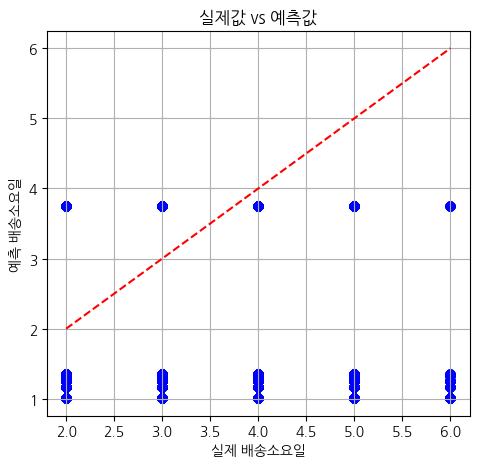

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 산점도: 실제 vs 예측
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred, alpha=0.3, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # y=x 기준선
plt.xlabel('실제 배송소요일')
plt.ylabel('예측 배송소요일')
plt.title('실제값 vs 예측값')
plt.grid(True)

C:\Users\hdemn\AppData\Local\Temp\ipykernel_176676\2308161214.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\hdemn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


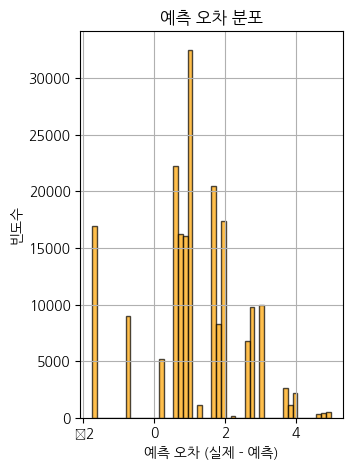

In [27]:
# 오차 분포 히스토그램
plt.subplot(1, 2, 2)
errors = y_true - y_pred
plt.hist(errors, bins=50, color='orange', edgecolor='k', alpha=0.7)
plt.xlabel('예측 오차 (실제 - 예측)')
plt.ylabel('빈도수')
plt.title('예측 오차 분포')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\hdemn\AppData\Local\Temp\ipykernel_176676\454072528.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


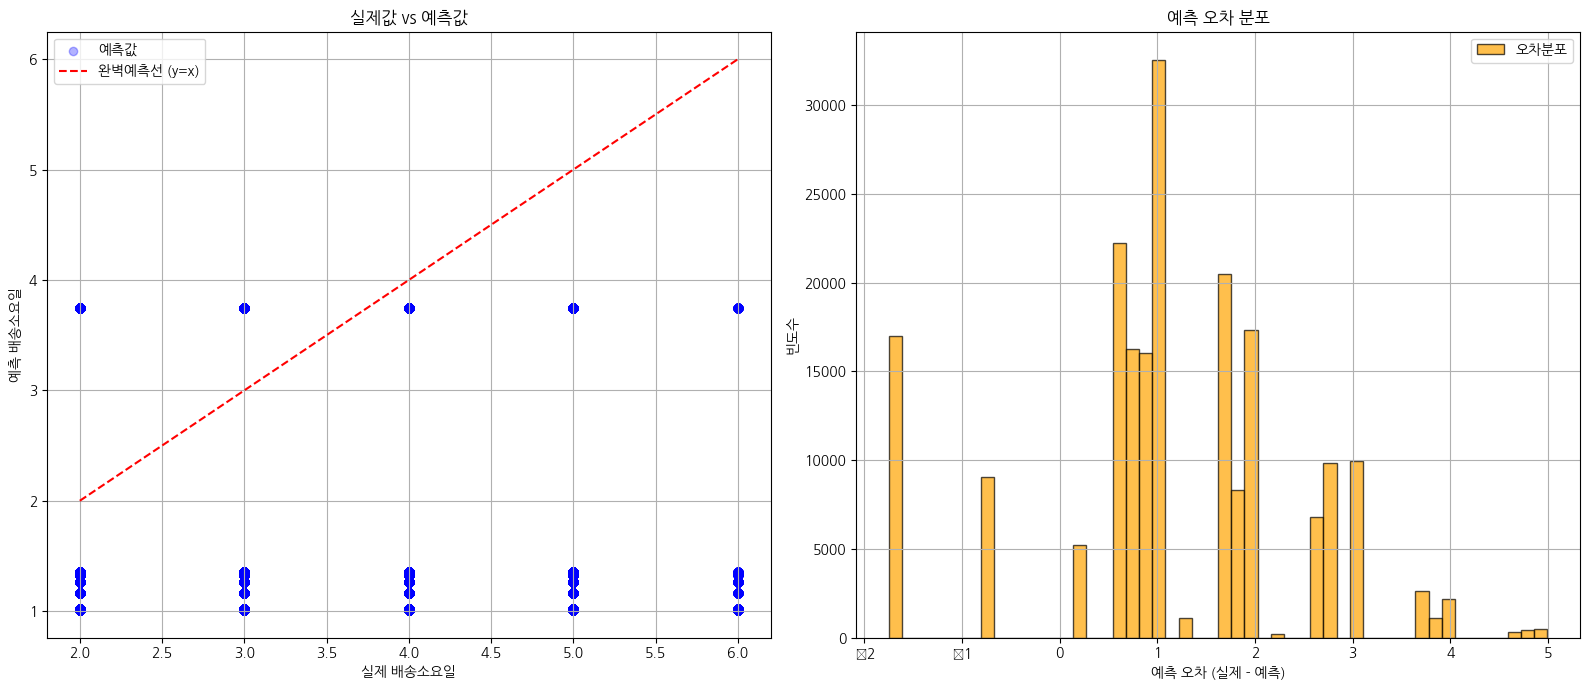

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred, alpha=0.3, color='blue', label='예측값')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='완벽예측선 (y=x)')
plt.xlabel('실제 배송소요일')
plt.ylabel('예측 배송소요일')
plt.title('실제값 vs 예측값')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
errors = y_true - y_pred
plt.hist(errors, bins=50, color='orange', edgecolor='k', alpha=0.7, label='오차분포')
plt.xlabel('예측 오차 (실제 - 예측)')
plt.ylabel('빈도수')
plt.title('예측 오차 분포')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# 이상치 확인
print(df['예상_배송소요일'].describe())

# 값 제한 후 날짜 계산
df['예상_배송소요일_clipped'] = df['예상_배송소요일'].clip(upper=60)
df['예상_배송완료일'] = df['배송시작일'] + pd.to_timedelta(df['예상_배송소요일_clipped'].round(), unit='D')

count    199582.000000
mean          1.592018
std           0.960118
min           1.009090
25%           1.017932
50%           1.261576
75%           1.352834
max           3.748754
Name: 예상_배송소요일, dtype: float64


In [14]:
print(df['예상_배송소요일'].isnull().sum())
print(np.isinf(df['예상_배송소요일']).sum())

0
0


In [15]:
print(df['배송시작일'].dtype)
print(df['배송시작일'].head())

datetime64[ns]
0   2022-01-02
1   2022-01-02
2   2022-01-02
3   2022-01-02
4   2022-01-02
Name: 배송시작일, dtype: datetime64[ns]


In [16]:
print(df['배송시작일'].min())
print(df['배송시작일'].max())

2022-01-02 00:00:00
2023-08-09 00:00:00


In [17]:
print(len(df))
print(len(df['예상_배송소요일']))
print(len(df['배송시작일']))

199582
199582
199582


In [18]:
import numpy as np

print("최대값:", df['예상_배송소요일'].max())
print("이상치 개수 (10 이상):", (df['예상_배송소요일'] > 10).sum())
print("음수 개수:", (df['예상_배송소요일'] < 0).sum())
print("inf 개수:", np.isinf(df['예상_배송소요일']).sum())
print("NaN 개수:", df['예상_배송소요일'].isna().sum())

최대값: 3.748753748766181
이상치 개수 (10 이상): 0
음수 개수: 0
inf 개수: 0
NaN 개수: 0


## 수동 autoML + lightGBM 사용한 버전으로 예측기 만들고 원본 배송 데이터 적용

In [1]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')
merged_df

C:\Users\hdemn\AppData\Local\Temp\ipykernel_174828\1838646914.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')


,DELIV_DATE,DELIV_PO_REGI_POCD,DISC_NO,DELIV_AREA_NO,MAIL_KIND_SP_CD,MAIL_SP_CD,SPCL_TRT_CD,DOM_EM_YN,RCV_PO_REGI_POCD,VST_PRCL_YN,...,MAIL_WGHT,MAIL_VOLM,RCV_DATE,SEMI_REGI_YN,BLD_MNGM_NO,DELIV_CTPV_NM,DELIV_CTGG_NM,DELIV_ADSTRD_NM,EUPD_IVNM,배송소요일
0,2023-04-01,40086,6064895955535,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,2023-03-31,N,4127310100105860000037211,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동,1
1,2023-04-01,40086,6865289638668,43501,1,2,1.0,N,35656.0,Y,...,NaN,50.0,2023-03-31,N,4127310100105860000037209,경기도,안산시 단원구,고잔동,충청남도 천안시 동남구 청당동,1
2,2023-04-01,40086,6892037503973,43501,1,2,1.0,N,14559.0,N,...,NaN,80.0,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,서울특별시 강서구 화곡1동,1
3,2023-04-01,40086,6064889866430,43501,1,2,1.0,N,10248.0,Y,...,NaN,NaN,2023-03-31,N,4127310100105860000037210,경기도,안산시 단원구,고잔동,인천광역시 중구 운서동,1
4,2023-04-01,40086,6096359238210,43501,1,2,1.0,N,40308.0,Y,...,NaN,50.0,2023-03-31,N,4127310100105860000037213,경기도,안산시 단원구,고잔동,경기도 평택시 비전동,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48946395,2023-04-30,41627,6861500034808,43006,1,2,1.0,N,10186.0,Y,...,NaN,50.0,2023-04-28,N,4159025328102200001033788,경기도,화성시,봉담읍,서울특별시 광진구 구의3동,2
48946396,2023-04-30,41627,7854151289393,43006,1,2,1.0,N,41627.0,Y,...,NaN,60.0,2023-04-21,N,4122025624103400032000001,경기도,평택시,포승읍,경기도 화성시 봉담읍 동화리,9
48946397,2023-04-30,41627,7493702010161,43006,1,2,1.0,N,49374.0,N,...,NaN,70.0,2023-04-28,N,4159025320200080001028607,경기도,화성시,봉담읍,경기도 용인시 처인구 김량장동,2
48946398,2023-04-30,15181,6141202185453,43907,1,2,1.0,N,14120.0,N,...,NaN,50.0,2023-04-28,N,1130510100101340094019141,서울특별시,강북구,송중동,서울특별시 영등포구 당산동4가,2


In [2]:
merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ✅ 확인
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object


In [1]:
import pandas as pd
df=pd.read_csv('배송.csv', encoding='utf-8-sig')
df.info()

C:\Users\hdemn\AppData\Local\Temp\ipykernel_173404\2128619102.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('배송.csv', encoding='utf-8-sig')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문번호    199582 non-null  object 
 1   배송완료일   199582 non-null  object 
 2   배송시작일   199582 non-null  object 
 3   구매일     199582 non-null  object 
 4   구매시월령   167839 non-null  float64
 5   고객번호    199582 non-null  float64
 6   구매금액    199582 non-null  int64  
 7   결제금액    199582 non-null  int64  
 8   물품대분류   199582 non-null  object 
 9   상품명     199582 non-null  object 
 10  성별      199582 non-null  object 
 11  결혼유무    199582 non-null  object 
 12  거주지역    199582 non-null  object 
 13  연령      199582 non-null  int64  
 14  결제등록카드  199582 non-null  object 
 15  유입경로    199582 non-null  object 
 16  자녀여부    199582 non-null  object 
 17  출산예정    199582 non-null  int64  
 18  배송소요일   199582 non-null  int64  
 19  총구매소요일  199582 non-null  int64  
 20  지연배송    199582 non-null  int64  
 21  휴일      19

In [2]:
# 날짜 변환
df['배송시작일'] = pd.to_datetime(df['배송시작일'], errors='coerce')
df['배송완료일'] = pd.to_datetime(df['배송완료일'], errors='coerce')

## 외부데이터로 모델을 만들고 저장

In [5]:
print(merged_df[feature_cols].dtypes)

DELIV_CTPV_NM      object
DELIV_CTGG_NM      object
EUPD_IVNM          object
deliv_year          int32
deliv_month         int32
deliv_dayofweek     int32
dtype: object


In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib  # 모델 저장/불러오기용

# 데이터 준비 (merged_df 가 있다고 가정)
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['RCV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['RCV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['RCV_DATE'].dt.dayofweek

cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = merged_df[col].astype(str)
    merged_df[col] = le.fit_transform(merged_df[col])  # ← 여기가 핵심
    label_encoders[col] = le
    joblib.dump(le, f'label_encoder_{col}.pkl')

feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']
X = merged_df[feature_cols]
y = merged_df['배송소요일']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'seed': 42
}

#model = lgb.train(params, train_data, valid_sets=[valid_data], early_stopping_rounds=50)

model = lgb.train(params, train_data, valid_sets=[valid_data])

# 모델 저장
joblib.dump(model, 'lightgbm_delivery_model.pkl')
print("모델 저장 완료")

모델 저장 완료


In [13]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import joblib

# 1. 기본 전처리
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['RCV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['RCV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['RCV_DATE'].dt.dayofweek

# 🔹 여기에 노이즈 추가
merged_df['deliv_year'] += np.random.uniform(-0.5, 0.5, len(merged_df))
merged_df['deliv_month'] += np.random.uniform(-0.2, 0.2, len(merged_df))
merged_df['deliv_dayofweek'] += np.random.uniform(-0.2, 0.2, len(merged_df))

# 2. 범주형 컬럼을 category 타입으로 지정 (train/test split 전에!)
cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
for col in cat_cols:
    merged_df[col] = merged_df[col].astype('category')

# 3. 학습 데이터셋 구성
feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']
X = merged_df[feature_cols]
y = merged_df['배송소요일']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. LightGBM Dataset 객체 생성
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
valid_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_cols)

# 5. 모델 학습
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, train_data, valid_sets=[valid_data])

# 6. 저장
joblib.dump(model, 'lightgbm_delivery_model.pkl')
print("✅ 모델 저장 완료")

✅ 모델 저장 완료


In [6]:
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 원본 데이터 로드 및 전처리 (merged_df 가 있다고 가정)
merged_df['배송소요일'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['RCV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['RCV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['RCV_DATE'].dt.dayofweek

# 동일한 label encoding 수행 (중요!)
cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    # 주의: 실제로는 train 때 쓴 인코더 저장 후 재사용해야 함

feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']

# 모델 불러오기
model = joblib.load('lightgbm_delivery_model.pkl')

# 예측
merged_df['예상_배송소요일'] = model.predict(merged_df[feature_cols], num_iteration=model.best_iteration)
merged_df['예상_배송완료일'] = merged_df['RCV_DATE'] + pd.to_timedelta(merged_df['예상_배송소요일'].round(), unit='D')

# 성능 평가
y_true = merged_df['배송소요일']
y_pred = merged_df['예상_배송소요일']
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

# 결과 일부 출력
print(merged_df[['RCV_DATE','예상_배송소요일', '예상_배송완료일']].head())

MAE: 1.0777442768882373
RMSE: 1.7833690261765462
    RCV_DATE  예상_배송소요일   예상_배송완료일
0 2023-03-31  1.907007 2023-04-02
1 2023-03-31  2.617619 2023-04-03
2 2023-03-31  3.311753 2023-04-03
3 2023-03-31  1.907007 2023-04-02
4 2023-03-31  2.413816 2023-04-02


## 저장한 모델을 불러와 배송데이터를 넣고 결과 예측값을 확인

In [15]:
import pandas as pd
import numpy as np
import joblib

df = pd.read_csv('배송.csv', encoding='utf-8-sig')

# 날짜 처리
df['배송시작일'] = pd.to_datetime(df['배송시작일'])
df['deliv_year'] = df['배송시작일'].dt.year
df['deliv_month'] = df['배송시작일'].dt.month
df['deliv_dayofweek'] = df['배송시작일'].dt.dayofweek

# 노이즈 추가
df['deliv_year'] = df['deliv_year'] + np.random.uniform(-0.5, 0.5, len(df))
df['deliv_month'] = df['deliv_month'] + np.random.uniform(-0.2, 0.2, len(df))
df['deliv_dayofweek'] = df['deliv_dayofweek'] + np.random.uniform(-0.2, 0.2, len(df))

# 출발지/도착지
df['DELIV_CTPV_NM'] = '경기도'
df['DELIV_CTGG_NM'] = '안산시 단원구'
df['EUPD_IVNM'] = df['거주지역']

# 범주형 타입 지정
cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
for col in cat_cols:
    df[col] = df[col].astype('category')

# 예측
feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM',
                'deliv_year', 'deliv_month', 'deliv_dayofweek']
model = joblib.load('lightgbm_delivery_model.pkl')
df['예상_배송소요일'] = model.predict(df[feature_cols])
df['예상_배송완료일'] = df['배송시작일'] + pd.to_timedelta(df['예상_배송소요일'].round(), unit='D')

C:\Users\hdemn\AppData\Local\Temp\ipykernel_174828\1236875605.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('배송.csv', encoding='utf-8-sig')


In [16]:
# 9. 결과 확인
print(df[['배송시작일', '거주지역', '예상_배송소요일', '예상_배송완료일']].head())

       배송시작일 거주지역  예상_배송소요일   예상_배송완료일
0 2022-01-02   서울   4.91377 2022-01-07
1 2022-01-02  충청도   4.91377 2022-01-07
2 2022-01-02   서울   4.91377 2022-01-07
3 2022-01-02   서울   4.91377 2022-01-07
4 2022-01-02   강원   4.91377 2022-01-07


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 실제 배송 완료일 컬럼이 있다고 가정
# 실제 배송소요일 계산
df['배송소요일'] = (pd.to_datetime(df['배송완료일']) - df['배송시작일']).dt.days

# MAE 계산
mae = mean_absolute_error(df['배송소요일'], df['예상_배송소요일'])

# RMSE 계산
rmse = np.sqrt(mean_squared_error(df['배송소요일'], df['예상_배송소요일']))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 40.503
RMSE: 54.175


In [16]:
le_ctpv = joblib.load('label_encoder_DELIV_CTPV_NM.pkl')
print("LabelEncoder 클래스 목록:", le_ctpv.classes_)
print("DELIV_CTPV_NM 예시값:", df['DELIV_CTPV_NM'].unique())

LabelEncoder 클래스 목록: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
DELIV_CTPV_NM 예시값: ['서울특별시']


In [5]:
print(merged_df['DELIV_CTPV_NM'])

0             경기도
1             경기도
2             경기도
3             경기도
4             경기도
            ...  
48946395      경기도
48946396      경기도
48946397      경기도
48946398    서울특별시
48946399      경기도
Name: DELIV_CTPV_NM, Length: 48946400, dtype: object


In [6]:
print(merged_df['DELIV_CTGG_NM'])

0           안산시 단원구
1           안산시 단원구
2           안산시 단원구
3           안산시 단원구
4           안산시 단원구
             ...   
48946395        화성시
48946396        평택시
48946397        화성시
48946398        강북구
48946399        화성시
Name: DELIV_CTGG_NM, Length: 48946400, dtype: object


In [8]:
print(merged_df['DELIV_CTPV_NM'].unique())

['경기도' '서울특별시' '제주특별자치도' '대구광역시' '충청남도' '울산광역시' '충청북도' '인천광역시' '경상남도'
 '세종특별자치시' '경상북도' '전라북도' '대전광역시' '광주광역시' '부산광역시' '전라남도' '강원도']
